In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read in the dataframes containing each models test set accuracy for different sized training sets.
small_gbf = pd.read_csv("./data/Processed/increment_train_size/model_test_scores/small_gbf_test_scores_FINAL.csv")
large_gbf = pd.read_csv("./data/Processed/increment_train_size/model_test_scores/large_gbf_test_scores_FINAL.csv")
nb_np = pd.read_csv("./data/Processed/increment_train_size/model_test_scores/nb_noPrior_test_scores_FINAL.csv")
nb_p = pd.read_csv("./data/Processed/increment_train_size/model_test_scores/nb_withFitPrior_test_scores_FINAL.csv")
rnn_ft = pd.read_csv("./data/Processed/increment_train_size/model_test_scores/rnn_ft_FINAL.csv")
rnn_32 = pd.read_csv("./data/Processed/increment_train_size/model_test_scores/rnn_embedding32_FINAL.csv")
rnn_256 = pd.read_csv("./data/Processed/increment_train_size/model_test_scores/rnn_embedding256_FINAL.csv")

# rnn dataframes with additional columns for training and validation accuracy
rnn_ft_all_columns_df = pd.read_csv("./data/Processed/increment_train_size/model_test_scores/rnn_ft_all_columns.csv")
rnn_32_all_columns_df = pd.read_csv("./data/Processed/increment_train_size/model_test_scores/rnn_embedding32_all_columns.csv")
rnn_256_all_columns_df = pd.read_csv("./data/Processed/increment_train_size/model_test_scores/rnn_embedding256_all_columns.csv")
                     
# Add a 'Name' column to each model performance dataframe.
small_gbf['Name'] =  'small_gbm'
large_gbf['Name'] = 'large_gbm'
nb_np['Name'] = 'naive_bayes_np'
nb_p['Name'] = 'naive_bayes_wp'
rnn_ft['Name'] = 'brnn_with_fasttext'
rnn_32['Name'] = 'regular_brnn_32'
rnn_256['Name'] = 'regular_brnn_256'

# Create a list of the model performance dataframes.
dfs = [small_gbf, large_gbf, nb_np, nb_p, rnn_ft, rnn_32, rnn_256]

# Dataframe that will store the base performances of all model types.
# Base performance is being defined as the models test accuracy when trained using 5000 training examples.
base_performances = pd.DataFrame({"Train_Size": [], "Test_Accuracy" : [], 'Name' : []})

In [3]:
# Create a base_performances dataframe 
for df in dfs: 
    base_performances = pd.concat([base_performances, df.loc[df['Train_Size'] == 5000, ['Train_Size', 'Test_Accuracy', 'Name']]], ignore_index=True)

# Display how each model type performed on the test set when trained on 5000 training examples.
base_performances

,Train_Size,Test_Accuracy,Name
0,5000.0,0.88264,small_gbm
1,5000.0,0.88180,large_gbm
2,5000.0,0.91288,naive_bayes_np
3,5000.0,0.91264,naive_bayes_wp
4,5000.0,0.95028,brnn_with_fasttext
5,5000.0,0.90776,regular_brnn_32
6,5000.0,0.91816,regular_brnn_256


In [4]:
# =========================================================================================================
# This function takes as inputs a list of model performance dataframes and plots the performance of 
# each model versus the amount of data that was used during training.
#
# The optional add_baseline_indicator parameter will add a vertical line at train set size = 5000.
# 
# 5000 samples is the amount of data that was initially used to tune the gradient boosted and naive bayes models.
# The hyperparameters found during the 5000 sample tuning were then held constant as the model was retrained
# with various other training set sizes.
# =========================================================================================================
def plot_model_accuracy(dfs, threshold=None, add_baseline_indicator=False, baseline_value = 5000):
    
    sns.set_style('darkgrid')
    
    if threshold is not None:
        filtered_dfs = [df.loc[df['Train_Size'] <= threshold, :] for df in dfs]
    else:
        filtered_dfs = dfs
    
    if len(dfs) > 1:
        all_model_df = pd.concat(filtered_dfs, ignore_index=True)
    else:
        all_model_df = dfs
    
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 8), squeeze=True)
    
    sns.lineplot(data=all_model_df, x='Train_Size', y='Test_Accuracy', legend='full', hue='Name', ax=axs)
    
    axs.set_title("Test set accuracy vs amount of training data", fontsize=28, weight='bold')
    axs.set_xlabel("Number of training examples", fontsize=20, weight='bold')
    axs.set_ylabel("Test Accuracy", fontsize=20, weight='bold')
    axs.tick_params(axis='both', labelsize=16)
    
    if add_baseline_indicator and ((threshold == None) or (threshold > baseline_value)):
        plt.axvline(5000, color='black', linewidth=1, linestyle = '--')
    
    
    axs.legend(fontsize='xx-large')
    plt.show()

# All Models

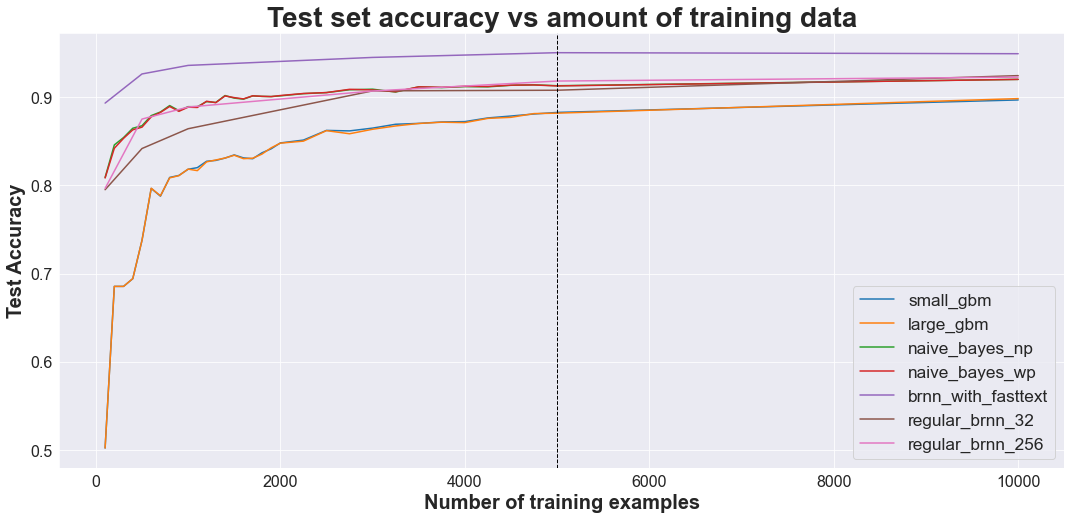

In [5]:
# =========================================================================================================
# The performance of all models as the training set size ranged from 100 - 10,000 samples.
#
# Shown in black is the 5000 sample training set size baseline. For the Naive Bayes and Gradient Boosted
# Decision Tree Models, this is the training set size that was used in the initial gridsearch where the
# models hyperparameters were determined. These hyperparameters were then held constant for retraining
# the model with all other training set sizes and evaluting on the test data.
# =========================================================================================================
plot_model_accuracy(dfs=dfs, threshold=10000, add_baseline_indicator=True)

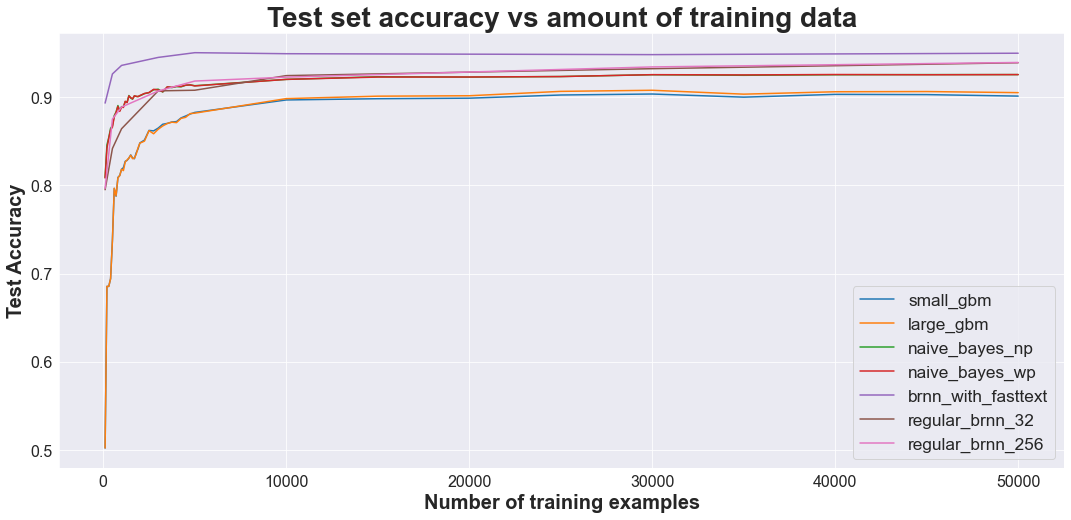

In [6]:
# =========================================================================================================
# The performance of all models as the training set size ranged from 100 - 50,000 samples.
# =========================================================================================================
plot_model_accuracy(dfs=dfs, threshold=50000)

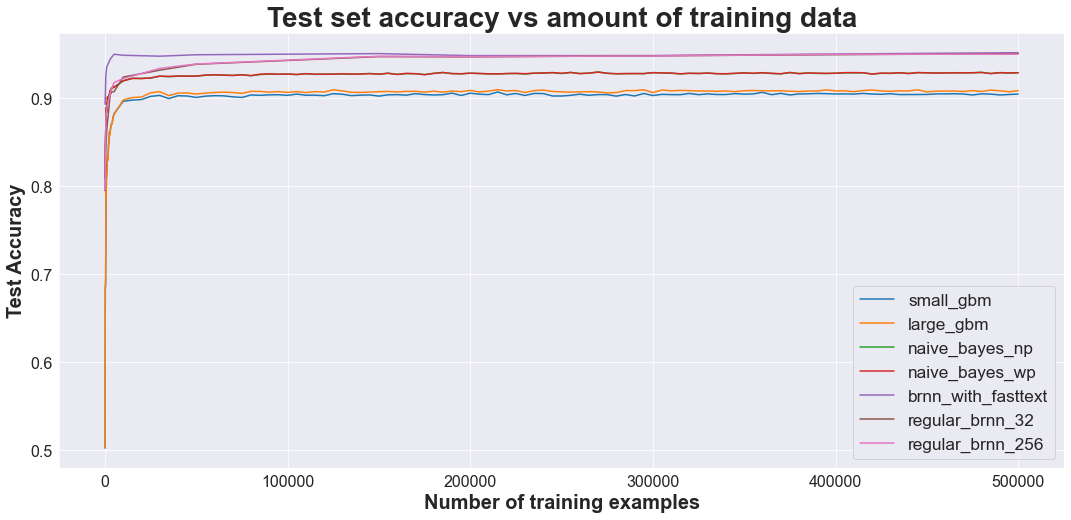

In [7]:
# =========================================================================================================
# The performance of all models as the training set size ranged from 100 - 500,000 samples.
# =========================================================================================================
plot_model_accuracy(dfs=dfs)

## Gradient Boosted Decision Tree Models Only

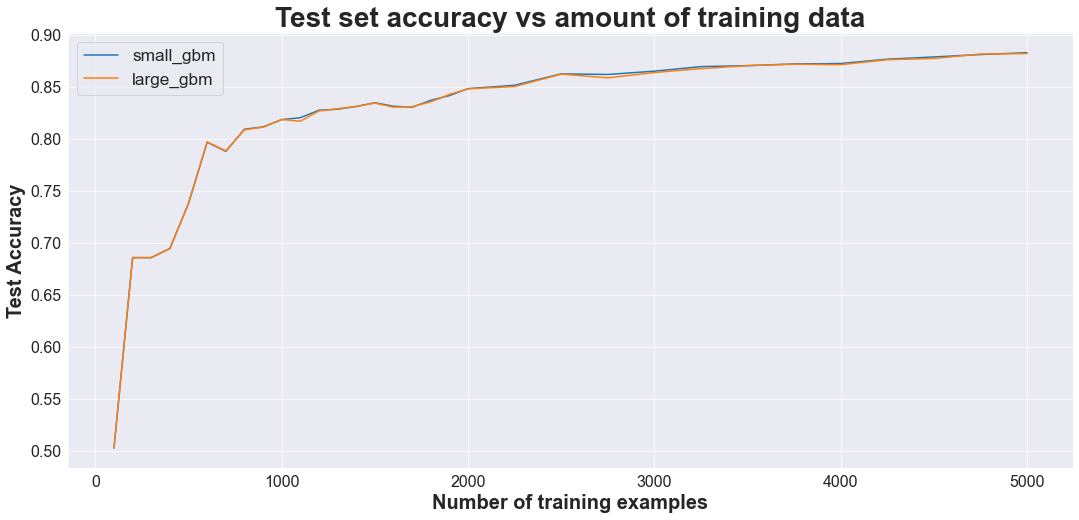

In [8]:
# ===========================================================================
# Nearly identical performance between the large and small gradient
# boosted decision tree models when training set was decreased below 5k.
# ===========================================================================
plot_model_accuracy(dfs=[small_gbf, large_gbf], threshold=5000)

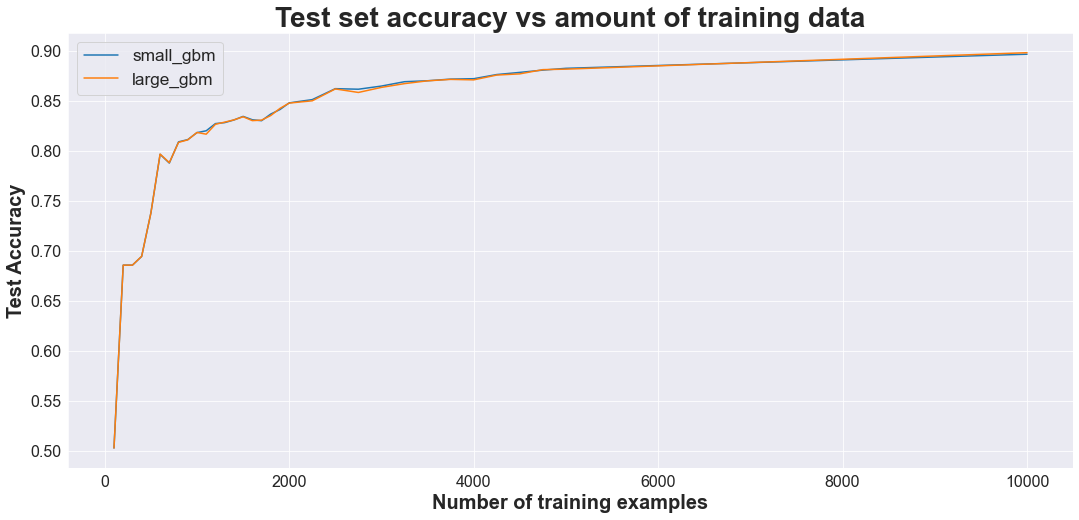

In [9]:
# ===========================================================================
# Very similar up to 10k.
# ===========================================================================
plot_model_accuracy(dfs=[small_gbf, large_gbf], threshold=10000)

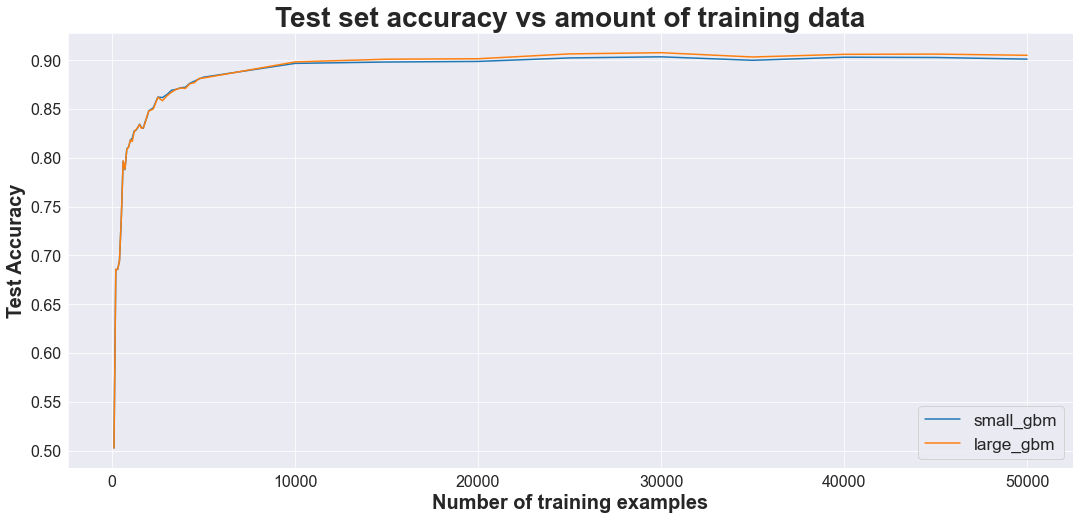

In [10]:
# ===========================================================================
# These models perform similarily across all training set sizes, but there is
# a slight trend where the larger model is conistently performing a little
# bit better.
# ===========================================================================
plot_model_accuracy(dfs=[small_gbf, large_gbf], threshold=50000)

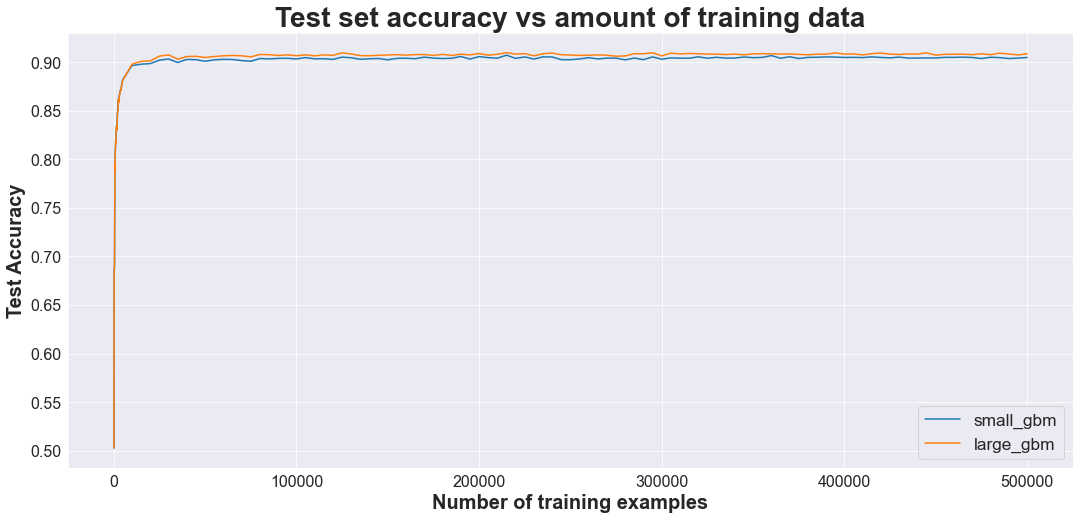

In [13]:
# ===========================================================================
# From ~15k on, the larger model consistently performs a little bit better.
# ===========================================================================
plot_model_accuracy(dfs=[small_gbf, large_gbf], threshold=500000)

## Naive Bayes Models Only

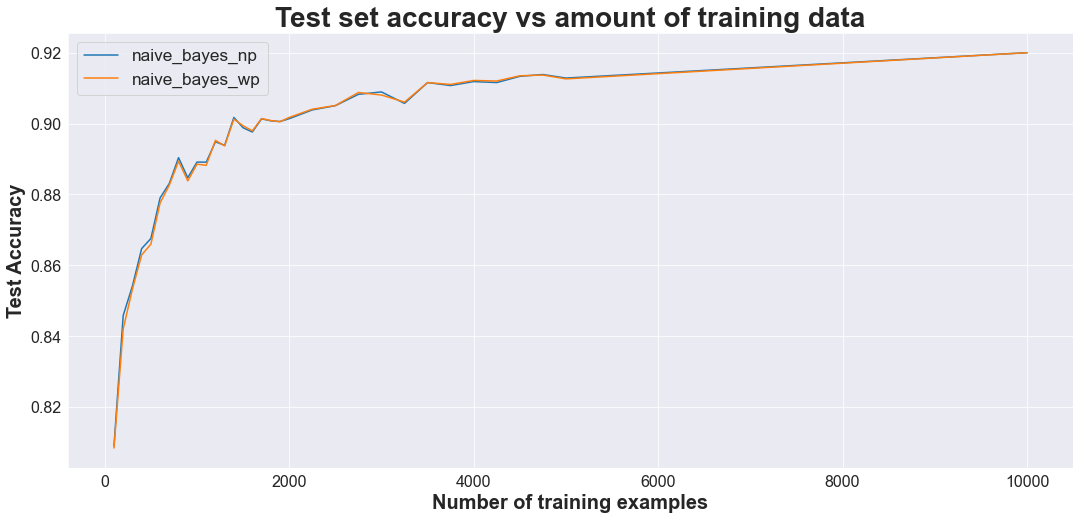

In [15]:
# ===========================================================================
# Very similar performance at smaller trainign set sizes.
# ===========================================================================
plot_model_accuracy(dfs=[nb_np, nb_p], threshold=10000)

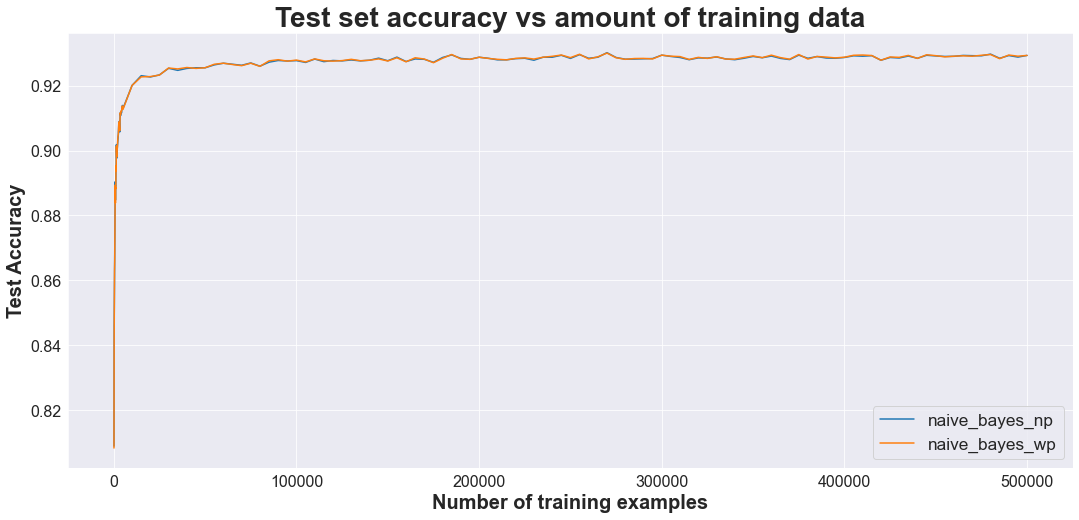

In [19]:
# ===========================================================================
# Very similar performance across all training set sizes.
# ===========================================================================
plot_model_accuracy(dfs=[nb_np, nb_p], threshold=500000)

## RNNs Only

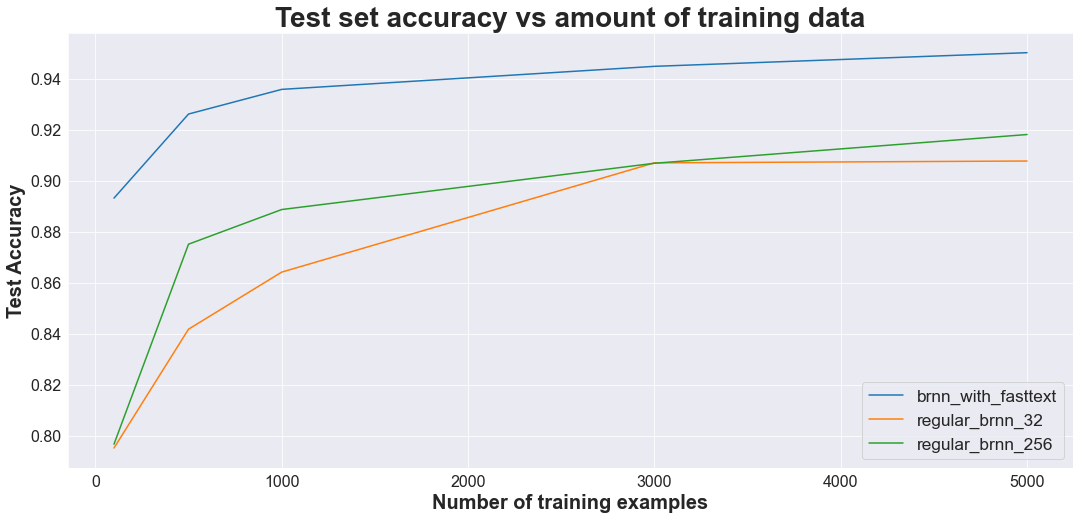

In [20]:
# ============================================================================================================================================================
# The RNN learning the larger embedding (256) improves quicker then the RNN with the 32 dimensional embeddings when the training set size increases
# from 100 to 500 samples. 
# ============================================================================================================================================================
plot_model_accuracy(dfs=[rnn_ft, rnn_32, rnn_256], threshold=5000)

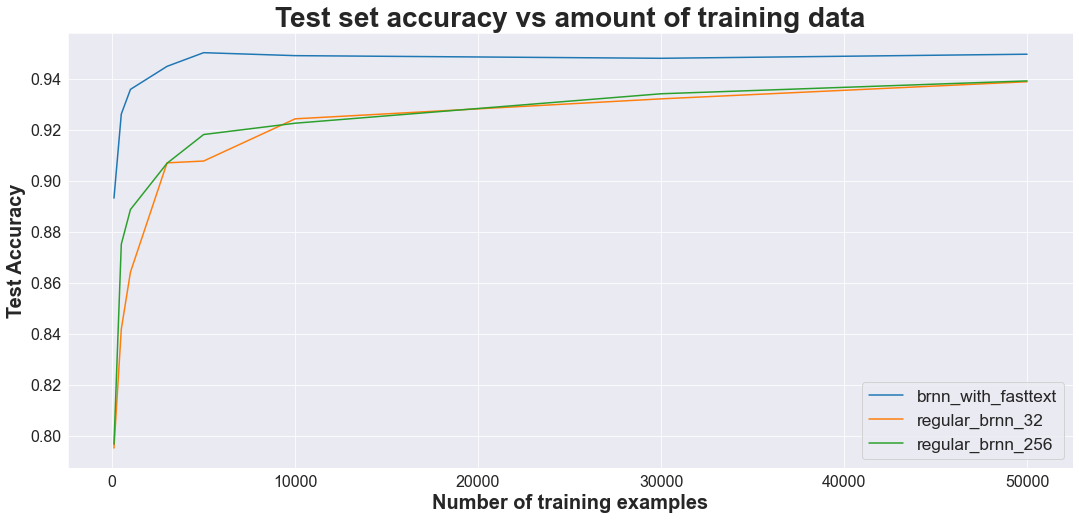

In [21]:
# ============================================================================================================================================================
# The BRNN that is learning a 32 dimensional word embedding performs very similar to the one learning the much larger 256 dimension word embedding.
#
# Both BRNNs that are learning word embeddings are still performing worse than the BRNN that was given pretrained fasttext embeddings when the
# training set is 50k samples.
#
# ============================================================================================================================================================
plot_model_accuracy(dfs=[rnn_ft, rnn_32, rnn_256], threshold=50000)

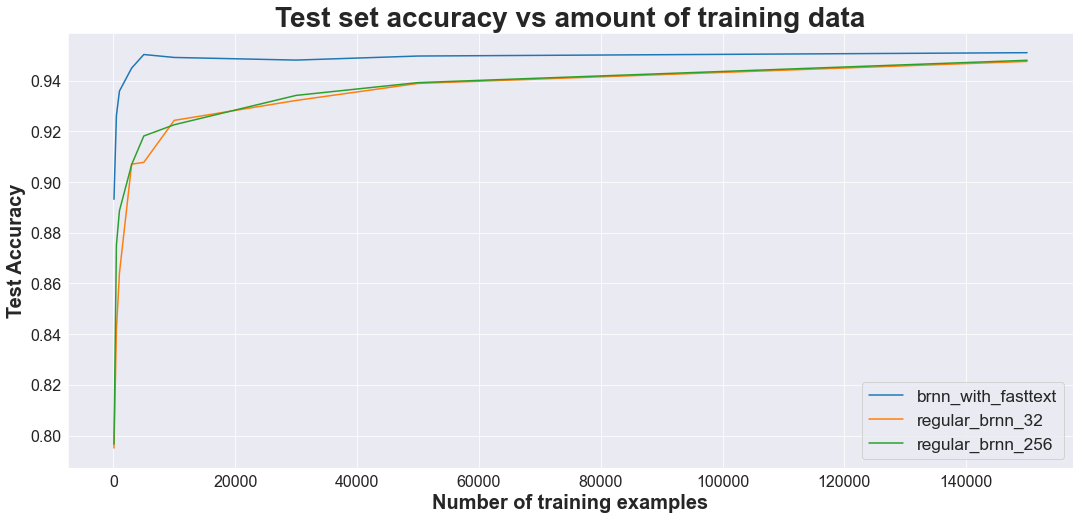

In [22]:
# ============================================================================================================================================================
# At 150k samples the BRNNS learning their embeddings are still not performing as well as the one with fasttext embeddings but the gap is closing significantly.
#
# ============================================================================================================================================================
plot_model_accuracy(dfs=[rnn_ft, rnn_32, rnn_256], threshold=150000)

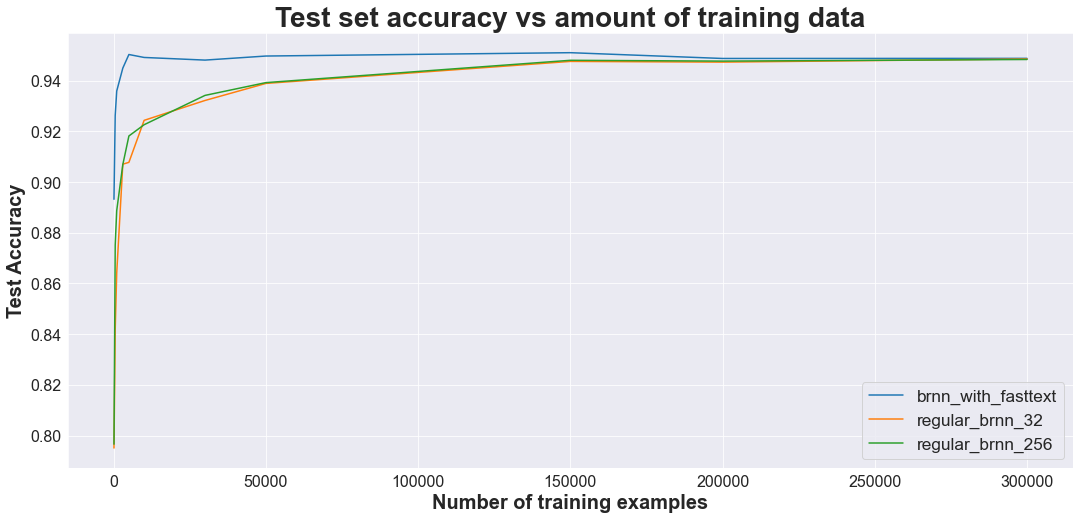

In [23]:
# ============================================================================================================================================================
# At 300k training examples, the performance of all three BRNNs is nearly identical.
# ============================================================================================================================================================
plot_model_accuracy(dfs=[rnn_ft, rnn_32, rnn_256], threshold=300000)

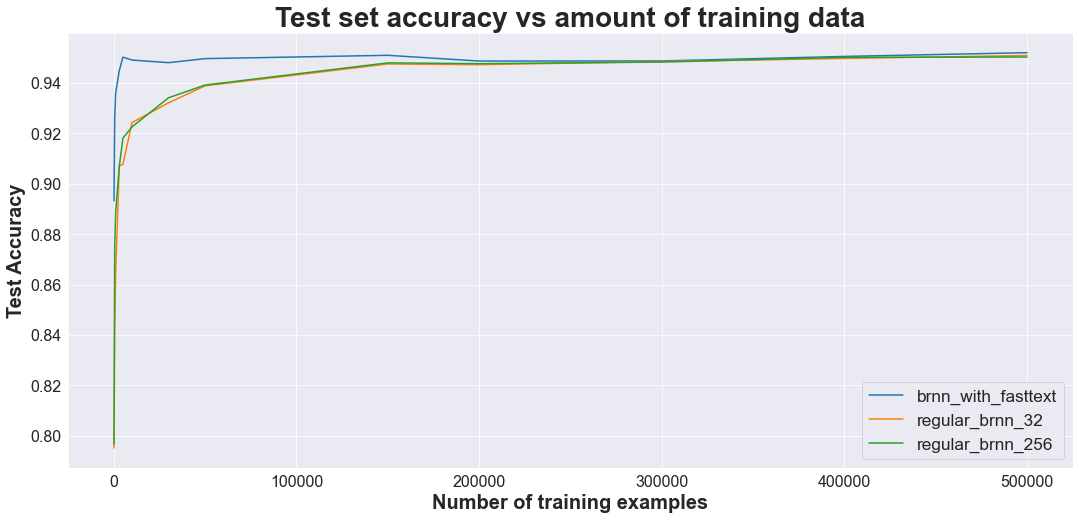

In [24]:
# ============================================================================================================================================================
# Shown below, the performance of three bidirectional recurrent neural networks as their training set size ranged from 100 - 500,000 samples.
#
# The only difference between the three neural networks is the word embeddings they use.
#
# Blue: The RNN was given fasttext word vectors trained on the same reddit posts to use in its embedding layer.
# Green: The RNN is learning its own 256 dimensional word embeddings.
# Orange: The RNN is learning its own 32 dimensional word embeddings.
# ============================================================================================================================================================
plot_model_accuracy(dfs=[rnn_ft, rnn_32, rnn_256], threshold=500000)